Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


the number of plate is HR.26 BR.9044


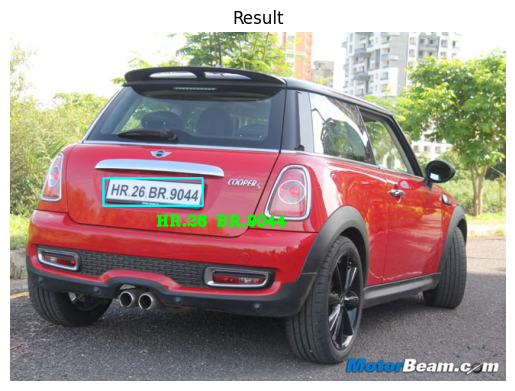

In [13]:
import cv2 
import matplotlib.pyplot as plt 
import imutils
import numpy as np
import easyocr

img = cv2.imread('image1.jpg')
gray= cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
bifilter = cv2.bilateralFilter(gray , 11, 17, 17)
blur = cv2.GaussianBlur(bifilter,(1,1), 0)
edged = cv2.Canny(bifilter,30,200)


keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:10]

location = None 

for contour in contours :
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location = approx
        break

mask = np.zeros(gray.shape,np.uint8)
new_img = cv2.drawContours(mask,[location],0,255,-1)
new_img = cv2.bitwise_and(img,img,mask=mask)

(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))

cropped = gray[x1:x2+1, y1:y2+1]


reader = easyocr.Reader(['en'])
result = reader.readtext(cropped)
print(f'the number of plate is {result[0][-2]}')


cv2.rectangle(img,(y1,x1),(y2,x2),(255,255,0),2)
cv2.putText(img,result[0][-2],(x1,y2+1),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Result')
plt.axis('off')
plt.show()
